# Image Segmentation
In this project we  test grabcut algorithm whose purpose is foreground extraction.

First we test the size of region of unknown and its effect on the accuracy of the algorithm

With tight region of interest wraps around the foreground, the region of unknown will be small. With loose region of interest wraps around
the foreground the region of unknown will be large. The images below show the result of the algorithm when testing on this parameter. The images on the left are the results with tight region; the images in the middle are the results with loose region; the images on the right are the ground truth images. 

In [72]:
import pandas as pd
from zipfile import ZipFile
import ast
from urllib.request import urlretrieve
from PIL import Image
import shapely.geometry
import os
import numpy as np
import matplotlib.pylab as plt
import cv2


class WindowData:
    def __init__(self, download=True, filename='data.zip', shuffle=True):
        self.filename = filename
        #self.shuffled = shuffle
        if not os.path.isfile(filename):
            if download:
                _, status = urlretrieve('http://teams.cec.miamioh.edu/Vision/facades/windows.zip', filename=filename)
                #TODO check status
            else:
                assert False, "No Data!"
        self.data = ZipFile(self.filename)
        self.dataframe = pd.read_csv(self.data.open('windows.csv'), index_col='id')
        if shuffle:
            self.dataframe = self.dataframe.sample(frac=1)
    
    def meta(self, index):
        return self.dataframe.iloc[index]
    
    def image_path(self, index):
        return f'windows/{self.meta(index).name}.jpg'
    
    def image(self, index):
        return Image.open(self.data.open(self.image_path(index)))
    
    def polygon(self, index):
        return np.array(ast.literal_eval(self.meta(index).local_polygon))
    
    def shape(self, index):
        """Shapely shape for the window 
        supports many geometric operations like 'buffer', 'intersect', 'interpolate', etc. """
        return shapely.geometry.Polygon(self.polygon(index))
        
    def plot(self, index, ax=None, **kwargs):
        ax = ax or plt.gca()
        image = self.image(index)
        poly = self.polygon(index)
        ax.imshow(image)
        ax.add_patch(plt.Polygon(poly, **kwargs))
        
    def __getitem__(self, index):
        return self.image(index), self.shape(index)
    
    def __len__(self): 
        return len(self.dataframe)
    
    def __repr__(self):
        return f'(WindowData with {len(self)} windows, shuffled={self.shuffled})'
        

In [63]:
def get_rect_from_poly(poly):
    min_corner_x = min(poly[0, 0], poly[1, 0], poly[2, 0], poly[3, 0])
    min_corner_y = min(poly[0, 1], poly[1, 1], poly[2, 1], poly[3, 1])
    max_corner_x = max(poly[0, 0], poly[1, 0], poly[2, 0], poly[3, 0])
    max_corner_y = max(poly[0, 1], poly[1, 1], poly[2, 1], poly[3, 1])
    if len(poly) != 4:
        print(poly)
    return (int(min_corner_x), int(min_corner_y), int(max_corner_x - min_corner_x), int(max_corner_y - min_corner_y))

In [64]:
def compute_iou(imMask, gtMask):
    for
#     image = imMask
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#     #(thresh, im_bw) = cv2.threshold(image, tresh_min, tresh_max, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#     (thresh, im_bw) = cv2.threshold(image, 128, 255, 0)
    
#     #cv2.imwrite('bw_'+'*im_name*', im_bw)
    
#     contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#     bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
    
#     #set boxA equal to the bounding box from contours, boxB equal to the ground truth box(annotated)
    
#     boxA = bounding_boxes
#     boxB = gtBox
    
    #why is it comparing str vs tuple???
#     print("Box A: ")
#     print(boxA)
#     print("Box B: ")
#     print(boxB)    
    
    #xA = max(boxA[0], boxB[0])
    #yA = max(boxA[1], boxB[1])
    #xB = min(boxA[2], boxB[2])
    #yB = min(boxA[3], boxB[3])
    
    # compute the area of intersection rectangle
    #interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # compute the area of both the prediction and ground-truth
    # rectangles
    #boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    #boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    #iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    #print(iou)
    #return iou

In [65]:
wd = WindowData()
print(wd.image_path(0))
print(wd.meta(0))
#print("Hello world")


windows/31fa48c830a211e99a70613cc4b52a17.jpg
bbox             [657.786740243564, 797.2401423104337, 704.7830...
date                                          24-Jul-2017 19:30:12
local_polygon    [[12.43650537900919, 12.032224253802951], [35....
name                                                        window
occluded                                                         0
Name: 31fa48c830a211e99a70613cc4b52a17, dtype: object


windows/31fa48c830a211e99a70613cc4b52a17.jpg
8883
(63, 47, 3)
31fa48c830a211e99a70613cc4b52a17
Box A: 
[(21, 44, 1, 2), (25, 40, 10, 9), (11, 11, 24, 40)]
Box B: 
[657.786740243564, 797.2401423104337, 704.7830383696577, 859.752682676243]
None


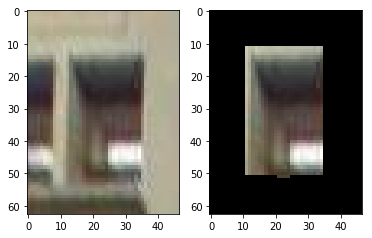

[[14.79891218 14.55368084]
 [42.91063522 14.9297027 ]
 [42.40654779 62.9406097 ]
 [14.55368084 63.06595031]
 [14.79891218 14.55368084]]
windows/3e02ffd430a211e99a70613cc4b52a17.jpg
13338
(78, 57, 3)
3e02ffd430a211e99a70613cc4b52a17
Box A: 
[(25, 62, 2, 2), (14, 59, 1, 2), (16, 56, 13, 7), (29, 55, 12, 8), (33, 39, 1, 1), (22, 39, 2, 1), (20, 39, 1, 2), (40, 16, 3, 1), (38, 16, 1, 1), (29, 14, 14, 3), (14, 14, 29, 28)]
Box B: 
[887.9972838322897, 1215.9389485731351, 945.4615998942251, 1293.5585797295512]
None


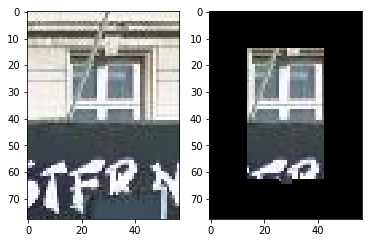

[[17.4 17.4]
 [68.4 17.4]
 [68.4 75.4]
 [17.4 75.4]
 [17.4 17.4]]
windows/3085fda230a211e99a70613cc4b52a17.jpg
23460
(92, 85, 3)
3085fda230a211e99a70613cc4b52a17
Box A: 
[(17, 60, 3, 8), (19, 40, 1, 4), (22, 25, 44, 22), (43, 21, 21, 7), (17, 19, 52, 63), (17, 17, 2, 17)]
Box B: 
[1116.6, 818.6, 1202.4, 911.4]
None


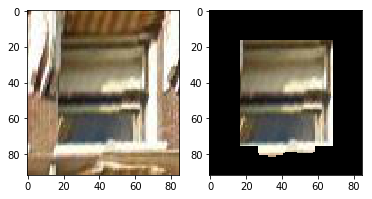

windows/3d5ebd1630a211e99a70613cc4b52a17.jpg
27927
(107, 87, 3)
3d5ebd1630a211e99a70613cc4b52a17
Box A: 
[(29, 57, 33, 12)]
Box B: 
[605.9, 21.900000000000002, 693.1, 129.1]
None


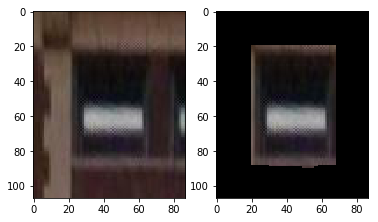

windows/2ef85dae30a211e99a70613cc4b52a17.jpg
42768
(99, 144, 3)
2ef85dae30a211e99a70613cc4b52a17
Box A: 
[(96, 72, 5, 1), (92, 72, 3, 1), (86, 72, 3, 1), (75, 72, 10, 1), (112, 71, 5, 2), (114, 64, 1, 4), (27, 63, 44, 10), (113, 61, 1, 2)]
Box B: 
[1414.0, 301.0, 1558.0, 400.0]
None


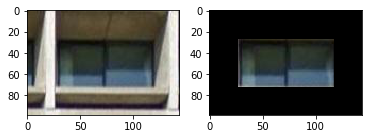

windows/2e2603e030a211e99a70613cc4b52a17.jpg
40020
(116, 115, 3)
2e2603e030a211e99a70613cc4b52a17
Box A: 
[(91, 72, 1, 1), (83, 66, 1, 1), (91, 65, 1, 1), (88, 40, 1, 1), (44, 39, 2, 2), (69, 38, 3, 5), (40, 37, 3, 5), (38, 37, 1, 1), (58, 35, 9, 8)]
Box B: 
[599.4, 824.4, 713.6, 939.6]
None


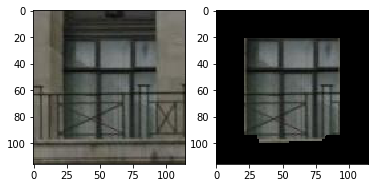

windows/403961f830a211e99a70613cc4b52a17.jpg
19008
(88, 72, 3)
403961f830a211e99a70613cc4b52a17
Box A: 
[(50, 71, 1, 1), (46, 71, 1, 1), (25, 70, 20, 5), (22, 70, 1, 1), (19, 46, 4, 19), (53, 40, 1, 2), (22, 32, 1, 10), (22, 29, 1, 1)]
Box B: 
[377.54603907883893, 523.8422927394286, 449.7578243965769, 612.4243858139107]
None


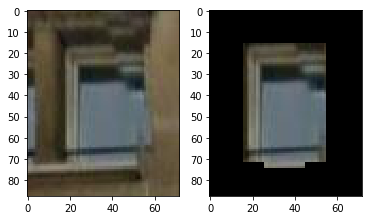

windows/37775c5a30a211e99a70613cc4b52a17.jpg
9720
(72, 45, 3)
37775c5a30a211e99a70613cc4b52a17
Box A: 
[(21, 46, 1, 1), (27, 43, 4, 16), (19, 42, 3, 2), (13, 13, 10, 46)]
Box B: 
[862.2738007293773, 671.7721210660602, 907.1565313280299, 744.0799629522432]
None


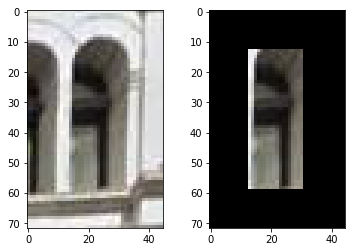

windows/37bfa68630a211e99a70613cc4b52a17.jpg
24510
(95, 86, 3)
37bfa68630a211e99a70613cc4b52a17
Box A: 
[(22, 72, 45, 8), (22, 34, 46, 23)]
Box B: 
[1046.3, 40.3, 1131.7, 134.7]
None


[[175.5 181.5]
 [313.5 181.5]
 [461.5 175.5]
 [613.5 178.5]
 [760.5 180.5]
 [759.5 226.5]
 [175.5 228.5]]
windows/3872135c30a211e99a70613cc4b52a17.jpg
1134432
(404, 936, 3)
3872135c30a211e99a70613cc4b52a17
Box A: 
[(527, 400, 1, 1), (544, 399, 1, 1), (538, 399, 4, 1), (472, 389, 1, 1), (416, 361, 8, 1), (414, 361, 1, 1), (410, 361, 2, 1), (408, 361, 1, 1), (401, 361, 5, 1), (399, 361, 1, 1), (312, 357, 2, 1), (263, 357, 1, 1), (241, 357, 16, 4), (322, 356, 5, 2), (318, 356, 3, 1), (465, 355, 3, 1), (458, 355, 5, 3), (328, 355, 129, 4), (457, 353, 1, 1), (433, 343, 1, 1), (459, 342, 1, 1), (389, 327, 1, 1), (389, 315, 1, 10), (389, 313, 1, 1), (536, 312, 1, 2), (393, 309, 1, 1), (392, 306, 1, 2), (389, 305, 1, 2), (464, 304, 1, 1), (392, 297, 1, 8), (389, 296, 1, 8), (392, 294, 1, 2), (336, 292, 1, 2), (389, 291, 1, 1), (371, 291, 1, 1), (389, 288, 1, 1), (389, 286, 1, 1), (311, 279, 1, 1), (594, 181, 3, 1), (385, 181, 1, 1), (380, 181, 4, 1), (371, 181, 5, 1), (368, 181, 2, 1), (362, 1

windows/2f7c5ba430a211e99a70613cc4b52a17.jpg
20592
(88, 78, 3)
2f7c5ba430a211e99a70613cc4b52a17
Box A: 
[(53, 27, 1, 1), (48, 22, 1, 1), (56, 16, 1, 1), (16, 16, 46, 61)]
Box B: 
[967.5, 685.5, 1045.5, 773.5]
None


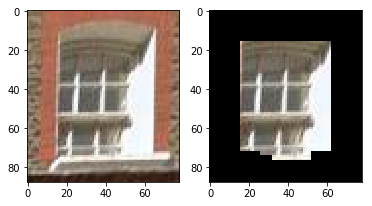

windows/3d2ccb1230a211e99a70613cc4b52a17.jpg
32568
(118, 92, 3)
3d2ccb1230a211e99a70613cc4b52a17
Box A: 
[(36, 84, 1, 1), (23, 29, 11, 4)]
Box B: 
[1284.1145473521024, 1148.7100694250373, 1375.6645892701297, 1267.1442022679723]
None


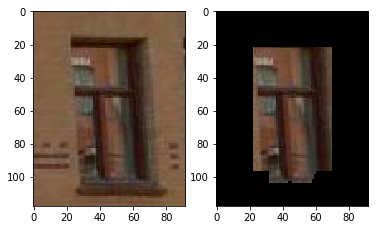

windows/353b373630a211e99a70613cc4b52a17.jpg
37248
(128, 97, 3)
353b373630a211e99a70613cc4b52a17
Box A: 
[(54, 86, 3, 2), (28, 62, 20, 28)]
Box B: 
[697.0, 470.0, 794.0, 598.0]
None


[[16.5 16.5]
 [53.5 16.5]
 [53.5 71.5]
 [16.5 71.5]
 [16.5 16.5]]
windows/2d5f9c0030a211e99a70613cc4b52a17.jpg
18480
(88, 70, 3)
2d5f9c0030a211e99a70613cc4b52a17
Box A: 
[(42, 71, 2, 3), (36, 71, 1, 3), (30, 71, 2, 2), (43, 67, 1, 1), (20, 67, 1, 2), (30, 66, 1, 2), (43, 65, 1, 1), (32, 64, 1, 1), (20, 63, 1, 2), (43, 61, 1, 2), (30, 60, 2, 4), (32, 56, 1, 1), (31, 54, 1, 1), (43, 45, 1, 15), (32, 45, 1, 4), (28, 45, 1, 4), (35, 44, 2, 25), (24, 44, 3, 24), (20, 44, 3, 17), (31, 37, 2, 5), (25, 37, 4, 5), (18, 36, 4, 6), (42, 27, 2, 15), (35, 27, 5, 15), (30, 22, 1, 1), (29, 19, 2, 1), (41, 16, 13, 1), (38, 16, 2, 1), (35, 16, 2, 1), (32, 16, 1, 1), (30, 16, 1, 1), (20, 16, 2, 1), (16, 16, 1, 2)]
Box B: 
[461.5, 878.5, 531.5, 966.5]
None


windows/3a08427230a211e99a70613cc4b52a17.jpg
21216
(104, 68, 3)
3a08427230a211e99a70613cc4b52a17
Box A: 
[(19, 25, 30, 62), (25, 24, 1, 1)]
Box B: 
[764.5, 1176.5, 832.5, 1280.5]
None


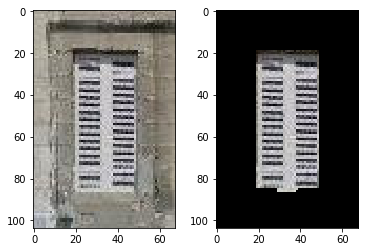

[[ 23.7  23.7]
 [ 93.7  25.7]
 [ 93.7 102.7]
 [ 23.7 100.7]
 [ 23.7  23.7]]
windows/3353920630a211e99a70613cc4b52a17.jpg
44958
(127, 118, 3)
3353920630a211e99a70613cc4b52a17
Box A: 
[(23, 23, 71, 83)]
Box B: 
[784.3, 426.3, 901.7, 552.7]
None


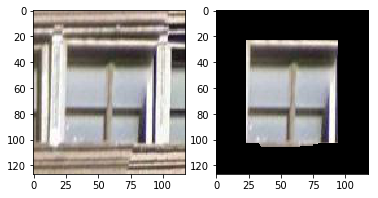

windows/30d6856030a211e99a70613cc4b52a17.jpg
27639
(111, 83, 3)
30d6856030a211e99a70613cc4b52a17
Box A: 
[(42, 77, 8, 4), (39, 73, 1, 2), (47, 70, 3, 5), (42, 69, 1, 1), (39, 69, 1, 3), (41, 47, 8, 4), (27, 37, 1, 2), (20, 36, 3, 7), (38, 34, 11, 11), (20, 33, 1, 1), (48, 26, 1, 1), (38, 25, 5, 2), (22, 25, 6, 2), (53, 21, 6, 1), (46, 21, 2, 1)]
Box B: 
[752.6042615155682, 784.5682696846679, 835.6690805716455, 895.8573526638589]
None


windows/4065716c30a211e99a70613cc4b52a17.jpg
14790
(85, 58, 3)
4065716c30a211e99a70613cc4b52a17
Box A: 
[(18, 64, 1, 1), (18, 16, 24, 54)]
Box B: 
[111.1, 1307.1, 168.9, 1391.9]
None


windows/3cc9832c30a211e99a70613cc4b52a17.jpg
31860
(118, 90, 3)
3cc9832c30a211e99a70613cc4b52a17
Box A: 
[(55, 97, 1, 1), (47, 97, 5, 1), (25, 85, 1, 1), (25, 81, 1, 1), (25, 78, 1, 1), (24, 69, 2, 3), (32, 62, 12, 1), (31, 58, 11, 2), (44, 57, 1, 2), (32, 54, 7, 2), (42, 53, 2, 2), (30, 50, 7, 2), (39, 49, 3, 3), (25, 47, 1, 1), (37, 46, 2, 1), (31, 46, 3, 2), (42, 45, 15, 21), (68, 40, 1, 3), (48, 40, 21, 26), (24, 34, 2, 3), (68, 28, 1, 7)]
Box B: 
[481.8, 538.8, 572.2, 657.2]
None


windows/3977b16230a211e99a70613cc4b52a17.jpg
53940
(145, 124, 3)
3977b16230a211e99a70613cc4b52a17
Box A: 
[]
Box B: 
[920.4936950781778, 1175.656626188618, 1044.356984231735, 1320.9779793800808]
None


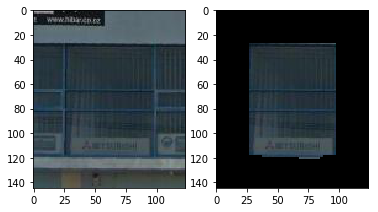

windows/2fcb016e30a211e99a70613cc4b52a17.jpg
18414
(93, 66, 3)
2fcb016e30a211e99a70613cc4b52a17
Box A: 
[(28, 74, 16, 2), (24, 74, 2, 1), (21, 74, 2, 1), (26, 72, 1, 1), (28, 71, 1, 1), (39, 70, 1, 1), (26, 68, 3, 1), (39, 67, 1, 2), (27, 65, 1, 1), (26, 63, 1, 1), (27, 58, 1, 1), (22, 52, 3, 20), (17, 31, 3, 44)]
Box B: 
[654.5726502862583, 1259.3415411163596, 721.3108687521419, 1351.6420969884566]
None


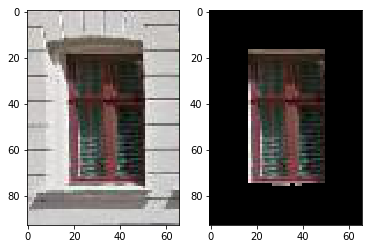

windows/39a72d5230a211e99a70613cc4b52a17.jpg
19665
(95, 69, 3)
39a72d5230a211e99a70613cc4b52a17
Box A: 
[(18, 51, 1, 19), (18, 43, 1, 7), (18, 26, 1, 13)]
Box B: 
[746.3, 1213.3, 814.7, 1307.7]
None


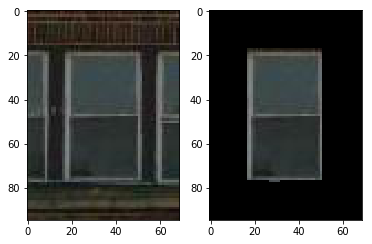

windows/387caf6a30a211e99a70613cc4b52a17.jpg
37530
(139, 90, 3)
387caf6a30a211e99a70613cc4b52a17
Box A: 
[(30, 105, 32, 7)]
Box B: 
[622.9, 1170.9, 713.1, 1310.1]
None


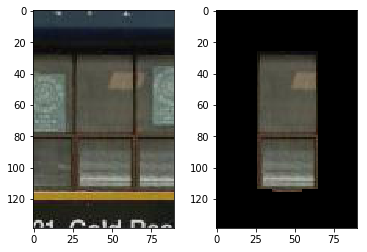

windows/31011c5830a211e99a70613cc4b52a17.jpg
34170
(134, 85, 3)
31011c5830a211e99a70613cc4b52a17
Box A: 
[(25, 78, 33, 32), (33, 65, 1, 2), (32, 61, 2, 3), (33, 56, 2, 2), (34, 29, 1, 1), (25, 25, 36, 62)]
Box B: 
[909.8, 464.8, 995.2, 599.2]
None


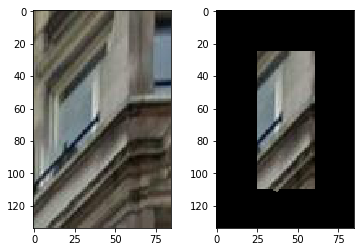

windows/400cc58a30a211e99a70613cc4b52a17.jpg
17472
(91, 64, 3)
400cc58a30a211e99a70613cc4b52a17
Box A: 
[(42, 57, 6, 17), (24, 57, 1, 16), (27, 56, 3, 18), (19, 56, 1, 17), (33, 55, 6, 19), (24, 55, 1, 1)]
Box B: 
[314.9, 750.9, 379.1, 842.1]
None


windows/3b980eba30a211e99a70613cc4b52a17.jpg
80997
(203, 133, 3)
3b980eba30a211e99a70613cc4b52a17
Box A: 
[(76, 158, 2, 2), (38, 156, 1, 1), (79, 155, 1, 5), (74, 155, 1, 1), (76, 152, 2, 2), (88, 144, 1, 1), (76, 144, 1, 3), (64, 134, 1, 2), (88, 133, 2, 2), (74, 133, 1, 12), (88, 130, 1, 1), (81, 128, 4, 8), (54, 93, 5, 3), (51, 88, 13, 6), (79, 73, 1, 2), (77, 70, 1, 2), (78, 63, 2, 1), (74, 63, 2, 1), (84, 61, 1, 3), (79, 61, 1, 1), (74, 60, 2, 2), (52, 60, 1, 1), (74, 57, 2, 2), (72, 38, 24, 124)]
Box B: 
[450.9, 805.9, 584.1, 1009.1]
None


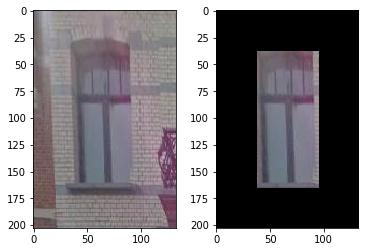

windows/376a54e230a211e99a70613cc4b52a17.jpg
24408
(113, 72, 3)
376a54e230a211e99a70613cc4b52a17
Box A: 
[(26, 89, 1, 2), (21, 59, 4, 34), (26, 58, 3, 3), (50, 32, 2, 1), (47, 32, 2, 1), (37, 32, 1, 2), (26, 28, 26, 65), (42, 26, 10, 7), (51, 21, 1, 1)]
Box B: 
[166.7, 873.7, 239.3, 987.3]
None


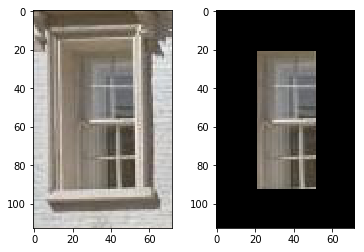

windows/3753f77e30a211e99a70613cc4b52a17.jpg
22032
(102, 72, 3)
3753f77e30a211e99a70613cc4b52a17
Box A: 
[(45, 71, 3, 1), (51, 70, 1, 1), (49, 70, 1, 1), (42, 69, 5, 2), (49, 68, 1, 1), (53, 49, 1, 34), (19, 22, 35, 62), (40, 19, 14, 2)]
Box B: 
[910.6029616002764, 1056.296712608591, 982.9930668612506, 1158.0698356755452]
None


[[22.2 22.2]
 [64.2 22.2]
 [64.2 96.2]
 [22.2 96.2]
 [22.2 22.2]]
windows/3b13cab030a211e99a70613cc4b52a17.jpg
30444
(118, 86, 3)
3b13cab030a211e99a70613cc4b52a17
Box A: 
[(54, 91, 1, 1), (54, 89, 1, 1), (51, 88, 2, 10), (54, 85, 6, 1), (49, 75, 4, 12), (55, 73, 1, 4), (55, 67, 1, 4), (53, 67, 1, 1), (53, 64, 1, 2), (53, 61, 1, 1), (56, 57, 1, 5), (56, 54, 1, 1), (54, 48, 1, 2), (56, 45, 2, 8), (57, 37, 1, 4), (54, 32, 3, 15), (56, 22, 1, 9)]
Box B: 
[693.8, 1052.8, 780.2, 1171.2]
None


[[ 27.3  27.3]
 [ 64.3  27.3]
 [ 64.3 118.3]
 [ 27.3 118.3]
 [ 27.3  27.3]]
windows/3fdee5de30a211e99a70613cc4b52a17.jpg
39585
(145, 91, 3)
3fdee5de30a211e99a70613cc4b52a17
Box A: 
[(44, 120, 4, 1), (27, 59, 1, 2), (58, 57, 5, 62), (32, 56, 5, 1), (60, 35, 3, 17), (27, 32, 34, 88)]
Box B: 
[1218.7, 1084.7, 1310.3, 1230.3]
None


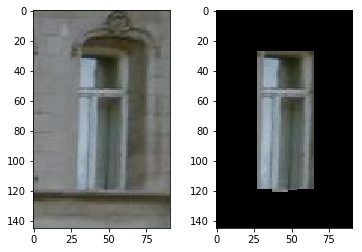

windows/3419a71630a211e99a70613cc4b52a17.jpg
27405
(105, 87, 3)
3419a71630a211e99a70613cc4b52a17
Box A: 
[(53, 58, 14, 33), (40, 54, 1, 1), (60, 50, 5, 1), (32, 50, 25, 41), (37, 50, 4, 1), (26, 50, 10, 41), (61, 46, 4, 2), (64, 41, 1, 1), (64, 34, 1, 5), (46, 25, 19, 23), (25, 21, 18, 27)]
Box B: 
[498.2415796394736, 1041.5679607364805, 585.0125818105296, 1146.661451518171]
None


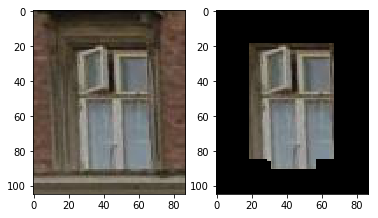

windows/410d22cc30a211e99a70613cc4b52a17.jpg
5265
(39, 45, 3)
410d22cc30a211e99a70613cc4b52a17
Box A: 
[(22, 29, 1, 2), (20, 29, 1, 2), (13, 29, 1, 2), (11, 27, 3, 1), (8, 27, 3, 4)]
Box B: 
[506.2051405621137, 1056.2716734051164, 550.5258390820065, 1095.0736978816146]
None


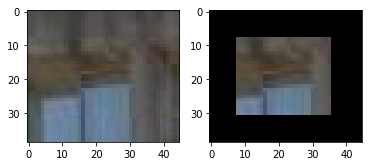

windows/4079e70030a211e99a70613cc4b52a17.jpg
18090
(67, 90, 3)
4079e70030a211e99a70613cc4b52a17
Box A: 
[(35, 39, 1, 1), (36, 35, 1, 3), (23, 19, 50, 34), (35, 16, 1, 1), (20, 16, 1, 1)]
Box B: 
[1221.2, 1147.2, 1310.8, 1213.8]
None


[[ 27.38029412  23.63619702]
 [ 66.72949929  23.63619702]
 [ 63.21580816 102.42352042]
 [ 23.63619702 102.42352042]
 [ 27.38029412  23.63619702]]
windows/2f62012830a211e99a70613cc4b52a17.jpg
34398
(126, 91, 3)
2f62012830a211e99a70613cc4b52a17
Box A: 
[(55, 96, 1, 1), (62, 94, 1, 1), (59, 88, 3, 2), (25, 42, 1, 2), (53, 40, 14, 43), (35, 25, 32, 5)]
Box B: 
[130.19512194464053, 1309.8245090085147, 220.56081825555844, 1435.8842264537318]
None


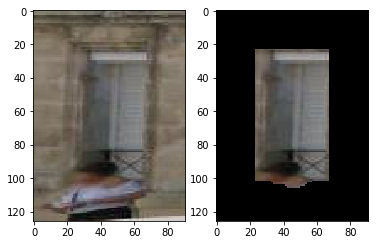

windows/4154794c30a211e99a70613cc4b52a17.jpg
20202
(91, 74, 3)
4154794c30a211e99a70613cc4b52a17
Box A: 
[(17, 19, 41, 57)]
Box B: 
[423.9, 761.9, 498.1, 853.1]
None


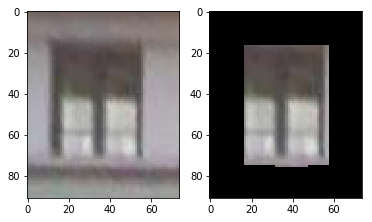

windows/3cf0daa830a211e99a70613cc4b52a17.jpg
17802
(69, 86, 3)
3cf0daa830a211e99a70613cc4b52a17
Box A: 
[(21, 16, 1, 1), (18, 16, 1, 1)]
Box B: 
[803.8, 1128.8, 890.2, 1198.2]
None


windows/3ebae64430a211e99a70613cc4b52a17.jpg
38400
(100, 128, 3)
3ebae64430a211e99a70613cc4b52a17
Box A: 
[(40, 39, 1, 1), (38, 38, 1, 1), (24, 26, 81, 52)]
Box B: 
[1202.0, 22.0, 1330.0, 122.0]
None


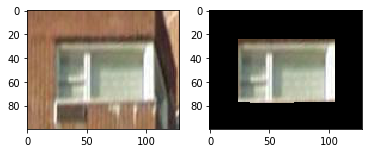

windows/2fae094230a211e99a70613cc4b52a17.jpg
12936
(56, 77, 3)
2fae094230a211e99a70613cc4b52a17
Box A: 
[(38, 19, 3, 22)]
Box B: 
[1070.0519535008957, 499.07136884619314, 1147.3208565017567, 554.9052664407642]
None


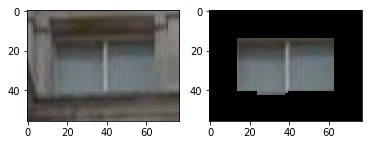

windows/2daea9d030a211e99a70613cc4b52a17.jpg
29580
(116, 85, 3)
2daea9d030a211e99a70613cc4b52a17
Box A: 
[(34, 85, 3, 7), (53, 49, 8, 44), (56, 47, 1, 1), (54, 45, 1, 3)]
Box B: 
[337.87220058865995, 840.9394612908266, 422.9490808418885, 957.0058109467448]
None


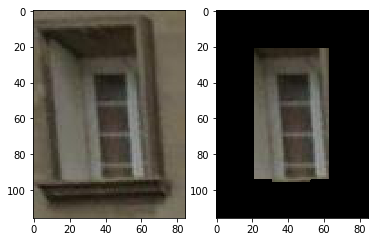

windows/2dfea98a30a211e99a70613cc4b52a17.jpg
20313
(111, 61, 3)
2dfea98a30a211e99a70613cc4b52a17
Box A: 
[]
Box B: 
[1014.3, 821.3, 1074.7, 931.7]
None


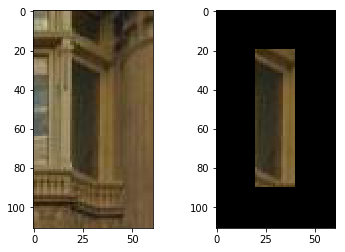

windows/349ce11c30a211e99a70613cc4b52a17.jpg
33276
(94, 118, 3)
349ce11c30a211e99a70613cc4b52a17
Box A: 
[(54, 72, 7, 1), (49, 72, 4, 1), (22, 68, 26, 5), (46, 60, 5, 1), (22, 30, 74, 43), (22, 22, 1, 2)]
Box B: 
[564.6316429155413, 935.9652088334915, 682.5845425251628, 1030.290546884501]
None


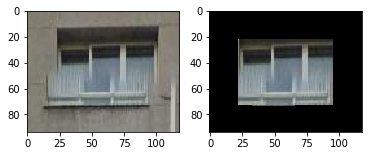

windows/2e2d11d030a211e99a70613cc4b52a17.jpg
26781
(113, 79, 3)
2e2d11d030a211e99a70613cc4b52a17
Box A: 
[]
Box B: 
[342.0575813144856, 1032.9125113783311, 421.476386218874, 1145.7893641545013]
None


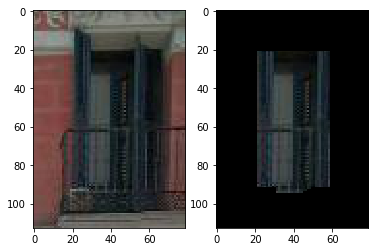

windows/3ed0ba3c30a211e99a70613cc4b52a17.jpg
64125
(171, 125, 3)
3ed0ba3c30a211e99a70613cc4b52a17
Box A: 
[(81, 138, 1, 1), (45, 138, 1, 1)]
Box B: 
[552.9, 578.9, 678.1, 750.1]
None


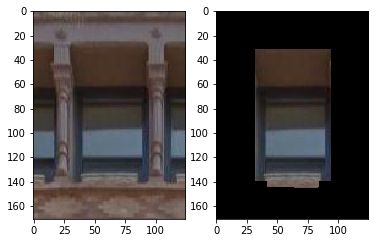

windows/39a72d2030a211e99a70613cc4b52a17.jpg
16005
(97, 55, 3)
39a72d2030a211e99a70613cc4b52a17
Box A: 
[(18, 61, 1, 3), (18, 50, 1, 2), (18, 42, 1, 3)]
Box B: 
[714.7, 1212.7, 770.3, 1310.3]
None


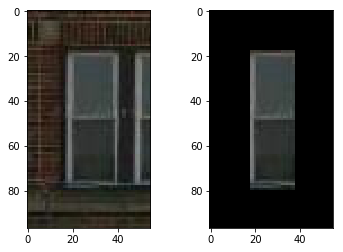

windows/30f1fb9230a211e99a70613cc4b52a17.jpg
46287
(139, 111, 3)
30f1fb9230a211e99a70613cc4b52a17
Box A: 
[]
Box B: 
[646.9, 247.9, 758.1, 387.1]
None


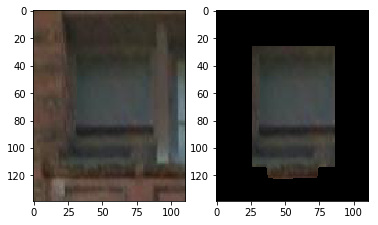

windows/39984ddc30a211e99a70613cc4b52a17.jpg
39087
(129, 101, 3)
39984ddc30a211e99a70613cc4b52a17
Box A: 
[(75, 61, 1, 36), (75, 50, 1, 9), (76, 41, 1, 1), (28, 40, 48, 68)]
Box B: 
[718.7, 1330.7, 820.3, 1460.3]
None


windows/34351d6630a211e99a70613cc4b52a17.jpg
12150
(75, 54, 3)
34351d6630a211e99a70613cc4b52a17
Box A: 
[(14, 56, 1, 5), (14, 53, 1, 2), (14, 49, 1, 2), (39, 48, 1, 1), (39, 45, 1, 2), (14, 43, 1, 3), (14, 39, 1, 1), (14, 37, 1, 1), (14, 34, 1, 1), (14, 32, 1, 1)]
Box B: 
[851.4317577112257, 1186.9094268369824, 905.1224401581599, 1261.8260255338107]
None


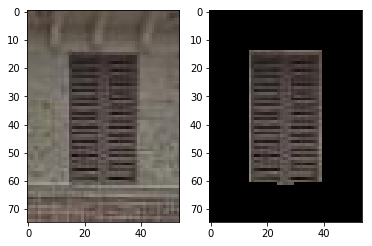

windows/2ff969c830a211e99a70613cc4b52a17.jpg
13542
(74, 61, 3)
2ff969c830a211e99a70613cc4b52a17
Box A: 
[(13, 15, 33, 49), (30, 13, 1, 1), (13, 13, 14, 1)]
Box B: 
[643.1163746762695, 1084.4393905474146, 703.7993429703163, 1158.4147076961356]
None


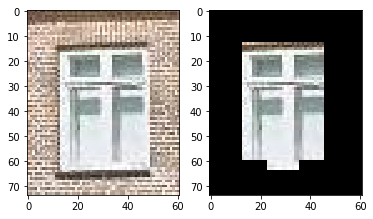

[[19.97997305 19.97997305]
 [84.97900837 19.97997305]
 [86.57988321 57.28053404]
 [21.91059619 57.28053404]
 [19.97997305 19.97997305]]
windows/2e6bec2a30a211e99a70613cc4b52a17.jpg
24717
(77, 107, 3)
2e6bec2a30a211e99a70613cc4b52a17
Box A: 
[(31, 58, 6, 1), (39, 51, 37, 8), (85, 33, 1, 1), (85, 31, 1, 1), (19, 19, 67, 38)]
Box B: 
[343.46115883702487, 1182.7743105598768, 450.02101509504814, 1260.034817649145]
None


windows/3aa1316c30a211e99a70613cc4b52a17.jpg
21420
(102, 70, 3)
3aa1316c30a211e99a70613cc4b52a17
Box A: 
[(36, 81, 2, 4), (20, 70, 14, 12), (29, 60, 4, 3), (19, 59, 10, 11), (46, 52, 1, 1), (51, 48, 1, 1), (49, 47, 1, 1), (51, 45, 1, 1), (19, 19, 33, 39)]
Box B: 
[1403.8, 1031.8, 1474.2, 1134.2]
None


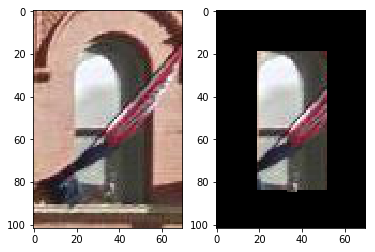

windows/3e8ce9c430a211e99a70613cc4b52a17.jpg
29103
(109, 89, 3)
3e8ce9c430a211e99a70613cc4b52a17
Box A: 
[(39, 72, 2, 16), (40, 64, 1, 1), (59, 63, 1, 25), (62, 50, 6, 30), (59, 48, 2, 3), (41, 21, 1, 1), (20, 20, 6, 69)]
Box B: 
[1175.439168878529, 1159.755943047813, 1264.212451834592, 1269.2715952925757]
None


windows/40ae6dcc30a211e99a70613cc4b52a17.jpg
65688
(161, 136, 3)
40ae6dcc30a211e99a70613cc4b52a17
Box A: 
[(31, 122, 1, 4), (89, 98, 17, 30), (82, 96, 8, 4), (89, 77, 17, 16), (31, 55, 3, 5), (104, 39, 1, 1), (30, 30, 62, 49)]
Box B: 
[1378.7, 1083.7, 1515.3, 1245.3]
None


windows/35fd761630a211e99a70613cc4b52a17.jpg
74550
(175, 142, 3)
35fd761630a211e99a70613cc4b52a17
Box A: 
[(37, 139, 1, 3), (34, 139, 1, 1), (34, 135, 1, 1), (36, 134, 1, 1), (32, 131, 2, 1), (37, 130, 2, 1), (35, 129, 1, 1), (32, 127, 2, 3), (32, 123, 1, 3), (32, 78, 3, 48), (32, 63, 3, 16), (32, 63, 1, 2), (37, 52, 1, 2), (39, 49, 2, 2), (41, 47, 1, 1), (32, 46, 6, 16), (42, 41, 5, 5), (39, 41, 2, 2), (42, 35, 7, 6), (47, 34, 10, 6), (59, 32, 2, 1), (49, 32, 5, 2)]
Box B: 
[1009.8962296704124, 1120.8251558989489, 1152.1264746550003, 1295.938747289311]
None


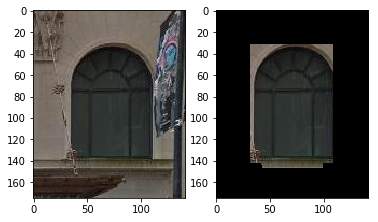

windows/3449155030a211e99a70613cc4b52a17.jpg
16200
(75, 72, 3)
3449155030a211e99a70613cc4b52a17
Box A: 
[(57, 61, 1, 1), (54, 61, 2, 1), (42, 34, 9, 1), (15, 34, 19, 1)]
Box B: 
[690.9, 1209.9, 763.1, 1285.1]
None


windows/35b89b6830a211e99a70613cc4b52a17.jpg
24396
(107, 76, 3)
35b89b6830a211e99a70613cc4b52a17
Box A: 
[(34, 89, 1, 1), (34, 87, 1, 1), (37, 78, 2, 1), (33, 78, 1, 1), (35, 76, 1, 1), (47, 64, 1, 1), (40, 64, 2, 1), (45, 61, 2, 1), (36, 56, 1, 1), (41, 53, 1, 1), (28, 53, 2, 1), (25, 53, 2, 1), (36, 51, 3, 3), (49, 50, 8, 15), (44, 49, 1, 2), (40, 37, 1, 1), (39, 32, 1, 1), (49, 25, 7, 24), (35, 25, 4, 24), (36, 24, 1, 2), (20, 23, 13, 31), (54, 22, 1, 2), (47, 20, 5, 2), (41, 20, 9, 28), (41, 20, 2, 1), (34, 20, 1, 1), (26, 20, 3, 1)]
Box B: 
[1094.9, 784.9, 1171.1, 892.1]
None


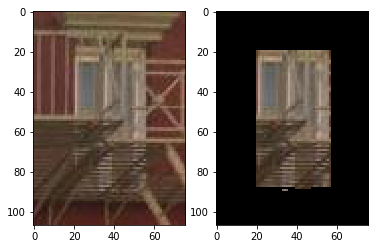

windows/408e8c7830a211e99a70613cc4b52a17.jpg
44352
(154, 96, 3)
408e8c7830a211e99a70613cc4b52a17
Box A: 
[(42, 124, 3, 1), (28, 123, 12, 2), (43, 116, 21, 9), (32, 89, 3, 1), (28, 34, 38, 78)]
Box B: 
[1566.9055503196437, 831.813630853721, 1662.5612050354346, 986.2895261637108]
None


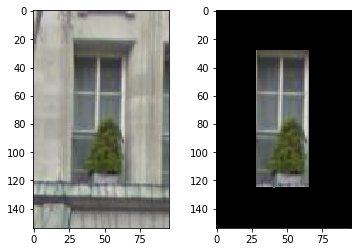

windows/4154b0d830a211e99a70613cc4b52a17.jpg
24624
(108, 76, 3)
4154b0d830a211e99a70613cc4b52a17
Box A: 
[(25, 71, 2, 1), (23, 37, 2, 6), (46, 30, 1, 2), (43, 29, 13, 15), (27, 28, 11, 17), (23, 23, 2, 13)]
Box B: 
[540.6, 1267.6, 617.4, 1376.4]
None


windows/3203373030a211e99a70613cc4b52a17.jpg
19008
(96, 66, 3)
3203373030a211e99a70613cc4b52a17
Box A: 
[(46, 75, 3, 2), (18, 72, 31, 8), (47, 71, 1, 2), (41, 70, 1, 1), (20, 64, 1, 1), (41, 62, 1, 3), (41, 56, 1, 4), (26, 56, 13, 4), (18, 55, 6, 5)]
Box B: 
[1079.0, 1183.0, 1145.0, 1279.0]
None


windows/366d15d430a211e99a70613cc4b52a17.jpg
10395
(63, 55, 3)
366d15d430a211e99a70613cc4b52a17
Box A: 
[(11, 39, 30, 15), (11, 17, 32, 22)]
Box B: 
[325.15744533610626, 953.3027123905445, 380.3553380555318, 1015.8011913735751]
None


windows/37bfa82a30a211e99a70613cc4b52a17.jpg
27072
(96, 94, 3)
37bfa82a30a211e99a70613cc4b52a17
Box A: 
[(54, 68, 1, 1), (27, 59, 45, 11), (26, 20, 46, 24)]
Box B: 
[850.0, 187.0, 944.0, 283.0]
None


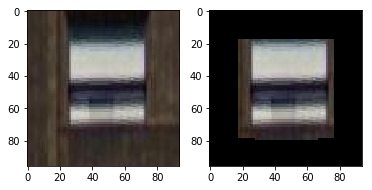

windows/3b63517030a211e99a70613cc4b52a17.jpg
15066
(81, 62, 3)
3b63517030a211e99a70613cc4b52a17
Box A: 
[(37, 67, 1, 1), (43, 66, 3, 1), (40, 65, 1, 1), (46, 31, 1, 1), (44, 26, 2, 4), (46, 24, 1, 1), (44, 17, 2, 8), (15, 15, 32, 53)]
Box B: 
[786.7, 1223.7, 849.3, 1305.3]
None


windows/3c5d594a30a211e99a70613cc4b52a17.jpg
62370
(135, 154, 3)
3c5d594a30a211e99a70613cc4b52a17
Box A: 
[(55, 107, 1, 1), (51, 107, 2, 1), (48, 107, 1, 1), (85, 106, 9, 3), (84, 105, 3, 1), (72, 105, 1, 1), (56, 105, 15, 3), (40, 75, 1, 1), (86, 70, 2, 1), (83, 68, 1, 1), (33, 58, 82, 46), (35, 55, 1, 1), (63, 47, 10, 3), (31, 44, 2, 62), (123, 39, 1, 1), (121, 35, 2, 3), (121, 32, 1, 1)]
Box B: 
[454.2, 1116.2, 607.8, 1250.8]
None


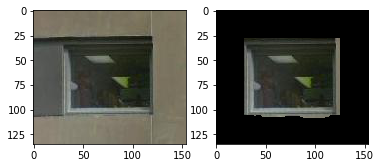

windows/3b27c03830a211e99a70613cc4b52a17.jpg
18060
(86, 70, 3)
3b27c03830a211e99a70613cc4b52a17
Box A: 
[(27, 67, 2, 1), (32, 65, 1, 1), (19, 64, 2, 1), (16, 58, 2, 6), (34, 56, 3, 12), (41, 52, 1, 2), (28, 52, 1, 2), (17, 52, 3, 2), (22, 51, 1, 2), (34, 47, 3, 8), (22, 47, 1, 2), (19, 47, 2, 2), (44, 46, 2, 12), (39, 46, 3, 9), (28, 46, 1, 2), (36, 43, 1, 1), (34, 42, 1, 2), (28, 42, 1, 2), (34, 40, 1, 1), (28, 40, 1, 1), (20, 39, 1, 1), (44, 37, 2, 8), (48, 36, 4, 21), (34, 36, 1, 2), (28, 36, 1, 2), (22, 36, 1, 1), (16, 36, 2, 14), (18, 35, 1, 2), (39, 32, 2, 10), (36, 32, 1, 1), (43, 27, 3, 6), (36, 27, 1, 3), (34, 27, 1, 3), (39, 26, 2, 5), (39, 22, 2, 2), (44, 21, 2, 3), (16, 21, 2, 13), (49, 20, 3, 14), (34, 20, 3, 4), (16, 16, 39, 55)]
Box B: 
[964.8, 1104.8, 1035.2, 1191.2]
None


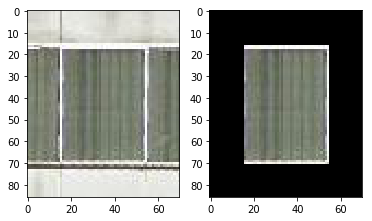

windows/37e304dc30a211e99a70613cc4b52a17.jpg
40320
(105, 128, 3)
37e304dc30a211e99a70613cc4b52a17
Box A: 
[]
Box B: 
[761.0, 1038.0, 889.0, 1143.0]
None


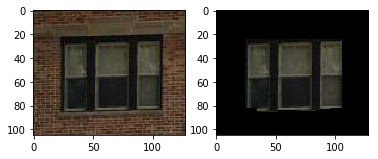

[[ 26.1  26.1]
 [ 69.1  26.1]
 [ 69.1 113.1]
 [ 26.1 113.1]
 [ 26.1  26.1]]
windows/37f18c6e30a211e99a70613cc4b52a17.jpg
39615
(139, 95, 3)
37f18c6e30a211e99a70613cc4b52a17
Box A: 
[(27, 104, 1, 8), (26, 97, 2, 6), (28, 94, 42, 22), (40, 75, 3, 5), (27, 54, 42, 39), (27, 48, 1, 1), (26, 43, 2, 4), (27, 28, 43, 25)]
Box B: 
[867.9, 1145.9, 963.1, 1285.1]
None


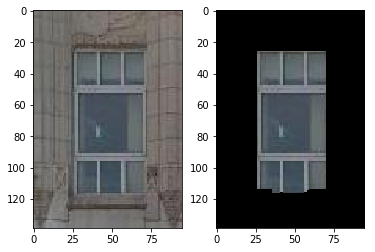

[[17.361948   17.11642423]
 [54.11067331 18.13256227]
 [53.97302134 74.17117168]
 [17.11642423 73.36323394]
 [17.361948   17.11642423]]
windows/3b4bb8da30a211e99a70613cc4b52a17.jpg
19383
(91, 71, 3)
3b4bb8da30a211e99a70613cc4b52a17
Box A: 
[(35, 22, 2, 1), (44, 20, 8, 1), (17, 19, 37, 55)]
Box B: 
[784.7419124623239, 1069.5318057705208, 855.9690100042164, 1160.8194016806463]
None


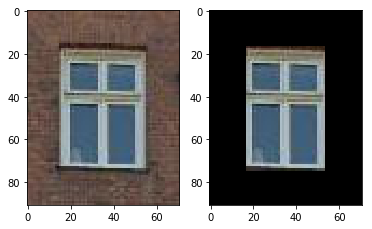

windows/3b1fa09230a211e99a70613cc4b52a17.jpg
92988
(164, 189, 3)
3b1fa09230a211e99a70613cc4b52a17
Box A: 
[(80, 134, 2, 1), (67, 134, 3, 1), (63, 134, 3, 1), (60, 134, 2, 1), (92, 131, 1, 1), (112, 130, 4, 1), (108, 130, 3, 1), (95, 130, 3, 1), (128, 129, 1, 1), (117, 129, 6, 2), (103, 100, 48, 11), (91, 94, 4, 5), (91, 73, 1, 3), (90, 55, 1, 1), (92, 50, 4, 8), (95, 49, 1, 4), (38, 37, 63, 98)]
Box B: 
[447.25186054297575, 721.0149785188406, 635.8661444409371, 884.9593880326869]
None


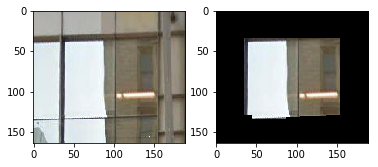

[[ 26.4  26.4]
 [ 71.4  26.4]
 [ 71.4 114.4]
 [ 26.4 114.4]
 [ 26.4  26.4]]
windows/37f18c3c30a211e99a70613cc4b52a17.jpg
40740
(140, 97, 3)
37f18c3c30a211e99a70613cc4b52a17
Box A: 
[(70, 114, 1, 1), (63, 114, 5, 1), (60, 114, 2, 1), (71, 109, 1, 2), (71, 107, 1, 1), (27, 47, 1, 1), (26, 30, 2, 14), (26, 28, 1, 1), (27, 26, 45, 89)]
Box B: 
[783.6, 1148.6, 881.4, 1289.4]
None


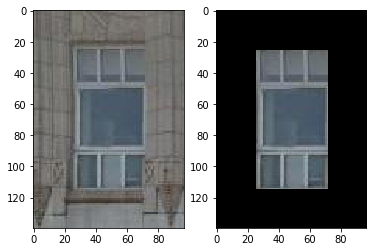

[[14.26374194 14.26374194]
 [61.80954839 16.49245161]
 [61.27890323 60.536     ]
 [14.68825806 58.09503226]
 [14.26374194 14.26374194]]
windows/3421347230a211e99a70613cc4b52a17.jpg
17100
(75, 76, 3)
3421347230a211e99a70613cc4b52a17
Box A: 
[(23, 47, 1, 5), (23, 43, 1, 2), (21, 43, 1, 2), (22, 35, 1, 2), (56, 24, 1, 1), (16, 15, 46, 43)]
Box B: 
[664.8779213709678, 1200.1606885080644, 740.9512116935483, 1274.9604304435484]
None


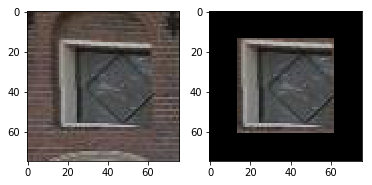

windows/3e721afe30a211e99a70613cc4b52a17.jpg
12006
(69, 58, 3)
3e721afe30a211e99a70613cc4b52a17
Box A: 
[(13, 50, 2, 3), (43, 18, 1, 34), (34, 15, 8, 1), (28, 15, 3, 1), (24, 15, 2, 1), (12, 13, 9, 39)]
Box B: 
[968.3493612250955, 1352.4242638385103, 1025.6285260951402, 1420.909058189607]
None


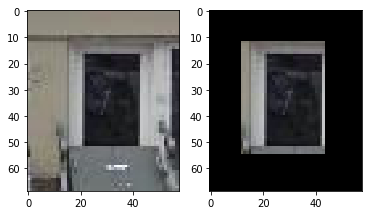

windows/2fbbf44e30a211e99a70613cc4b52a17.jpg
11400
(76, 50, 3)
2fbbf44e30a211e99a70613cc4b52a17
Box A: 
[(25, 38, 12, 25), (14, 14, 6, 49)]
Box B: 
[608.6, 414.6, 659.4, 491.4]
None


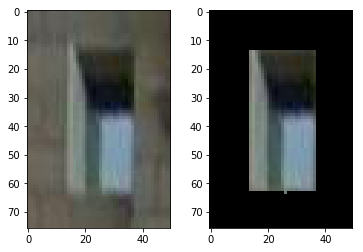

[[16.5 16.5]
 [56.5 16.5]
 [56.5 71.5]
 [16.5 71.5]
 [16.5 16.5]]
windows/3da8ba5630a211e99a70613cc4b52a17.jpg
19272
(88, 73, 3)
3da8ba5630a211e99a70613cc4b52a17
Box A: 
[(56, 50, 1, 22), (24, 36, 4, 4), (26, 31, 2, 1), (26, 29, 2, 1), (25, 27, 4, 1), (25, 25, 3, 1), (24, 18, 33, 30)]
Box B: 
[350.7467532467532, 1064.7987012987012, 423.7467532467532, 1152.7987012987012]
None


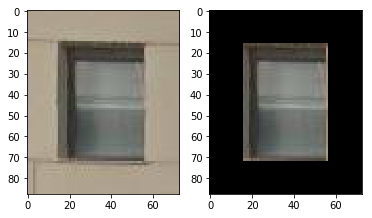

windows/40a8761030a211e99a70613cc4b52a17.jpg
2340
(30, 26, 3)
40a8761030a211e99a70613cc4b52a17
Box A: 
[]
Box B: 
[712.203103472067, 1274.3277573547075, 738.1364171453174, 1303.665907204595]
None


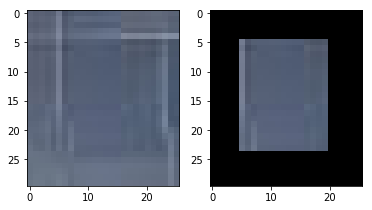

windows/40397dbe30a211e99a70613cc4b52a17.jpg
19494
(114, 57, 3)
40397dbe30a211e99a70613cc4b52a17
Box A: 
[(27, 74, 2, 13), (28, 70, 1, 2), (30, 55, 1, 37)]
Box B: 
[762.7042497534735, 435.32120602865484, 819.5408697970195, 549.3213360372396]
None


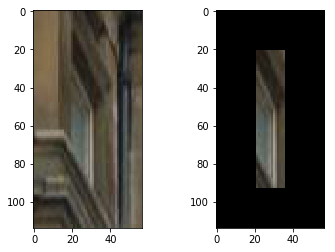

windows/3e771d1030a211e99a70613cc4b52a17.jpg
48672
(104, 156, 3)
3e771d1030a211e99a70613cc4b52a17
Box A: 
[(29, 29, 99, 75)]
Box B: 
[879.6, -27.4, 1036.4, 77.4]
None


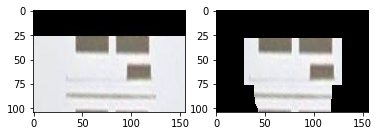

windows/40123b0030a211e99a70613cc4b52a17.jpg
17100
(95, 60, 3)
40123b0030a211e99a70613cc4b52a17
Box A: 
[(21, 18, 21, 60)]
Box B: 
[231.3, 1175.3, 290.7, 1269.7]
None


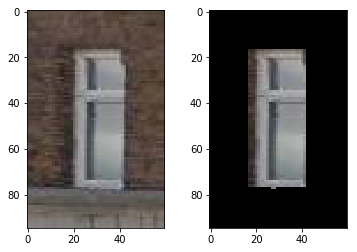

windows/2de0352c30a211e99a70613cc4b52a17.jpg
74385
(145, 171, 3)
2de0352c30a211e99a70613cc4b52a17
Box A: 
[(101, 140, 28, 5), (66, 140, 28, 5), (32, 32, 108, 96)]
Box B: 
[905.9, 14.899999999999999, 1077.1, 160.1]
None


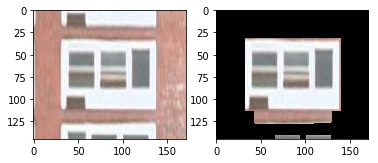

windows/400ae72430a211e99a70613cc4b52a17.jpg
18042
(97, 62, 3)
400ae72430a211e99a70613cc4b52a17
Box A: 
[(20, 56, 18, 12), (31, 55, 1, 1), (27, 51, 4, 3), (30, 47, 15, 16), (44, 43, 1, 2), (18, 18, 27, 1)]
Box B: 
[788.7, 1014.7, 851.3, 1112.3]
None


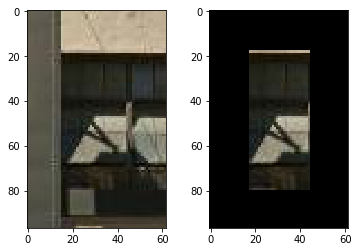

windows/4129c38230a211e99a70613cc4b52a17.jpg
62865
(127, 165, 3)
4129c38230a211e99a70613cc4b52a17
Box A: 
[(66, 98, 5, 1), (56, 98, 7, 1), (89, 97, 9, 1), (112, 46, 22, 52), (30, 30, 4, 66)]
Box B: 
[1891.1, 479.1, 2055.9, 605.9]
None


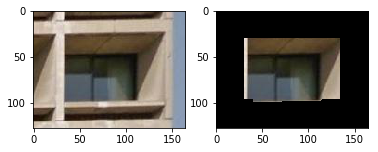

windows/3b27c2ea30a211e99a70613cc4b52a17.jpg
15600
(80, 65, 3)
3b27c2ea30a211e99a70613cc4b52a17
Box A: 
[(21, 65, 1, 1), (47, 64, 1, 2), (16, 64, 1, 1), (32, 63, 3, 5), (23, 63, 3, 3), (32, 59, 3, 3), (31, 57, 1, 1), (16, 56, 1, 1), (25, 55, 2, 2), (42, 53, 9, 13), (35, 53, 1, 1), (21, 52, 2, 1), (46, 50, 2, 2), (40, 49, 4, 5), (21, 49, 4, 3), (26, 47, 2, 1), (30, 46, 10, 7), (31, 45, 1, 1), (15, 45, 6, 6), (40, 44, 1, 1), (48, 43, 1, 1), (42, 43, 1, 2), (50, 42, 1, 1), (44, 42, 2, 1), (50, 40, 1, 1), (15, 40, 3, 3), (45, 37, 1, 1), (31, 36, 1, 1), (16, 36, 1, 1), (47, 34, 2, 2), (33, 33, 6, 12), (28, 33, 2, 3), (25, 33, 1, 1), (42, 31, 1, 1), (40, 31, 1, 1), (37, 31, 2, 1), (46, 30, 1, 1), (44, 30, 1, 1), (37, 29, 1, 1), (40, 27, 1, 1), (38, 27, 1, 1), (32, 27, 4, 6), (15, 24, 2, 2), (28, 23, 4, 9), (17, 21, 2, 1), (22, 20, 1, 1), (17, 19, 1, 1), (43, 15, 8, 14), (38, 15, 1, 2), (28, 15, 12, 10), (15, 15, 13, 23)]
Box B: 
[621.0, 1281.0, 686.0, 1361.0]
None


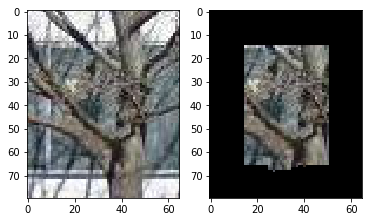

windows/3f414f3630a211e99a70613cc4b52a17.jpg
9315
(45, 69, 3)
3f414f3630a211e99a70613cc4b52a17
Box A: 
[(12, 12, 43, 22)]
Box B: 
[717.995921946222, 543.8091353658807, 786.5418959753736, 588.7112999485734]
None


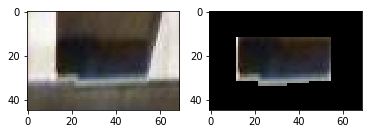

windows/32a8b98030a211e99a70613cc4b52a17.jpg
19950
(95, 70, 3)
32a8b98030a211e99a70613cc4b52a17
Box A: 
[]
Box B: 
[328.8602775839543, 1074.753658235504, 399.4408891351453, 1169.529600985021]
None


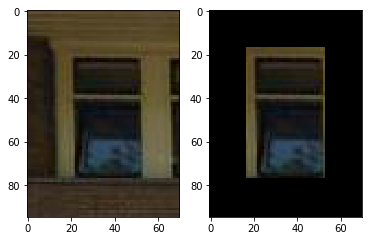

windows/40a886dc30a211e99a70613cc4b52a17.jpg
1479
(17, 29, 3)
40a886dc30a211e99a70613cc4b52a17
Box A: 
[]
Box B: 
[1042.2576676152269, 1195.3362673653817, 1070.6781348940453, 1212.1925054354945]
None


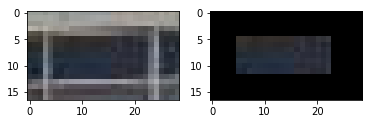

windows/34680d8e30a211e99a70613cc4b52a17.jpg
78144
(148, 176, 3)
34680d8e30a211e99a70613cc4b52a17
Box A: 
[(73, 145, 2, 2), (46, 144, 12, 4), (43, 132, 91, 16), (33, 34, 111, 82), (142, 33, 2, 1), (137, 33, 1, 1)]
Box B: 
[268.0, 626.0, 444.0, 774.0]
None


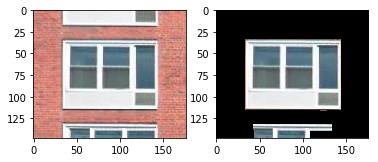

[[ 24.99255459  24.99255459]
 [ 59.76918939  24.99255459]
 [ 59.96102301 108.30106989]
 [ 25.57265733 108.30106989]
 [ 24.99255459  24.99255459]]
windows/358858d630a211e99a70613cc4b52a17.jpg
33915
(133, 85, 3)
358858d630a211e99a70613cc4b52a17
Box A: 
[(37, 107, 2, 1), (34, 107, 1, 1), (32, 107, 1, 1), (29, 106, 1, 1), (36, 105, 2, 1), (33, 104, 2, 1), (30, 104, 2, 1), (28, 104, 1, 1), (47, 101, 2, 3), (30, 101, 1, 1), (56, 100, 1, 1), (53, 100, 2, 1), (40, 100, 6, 8), (32, 100, 7, 4), (29, 82, 1, 1), (33, 47, 1, 1), (28, 39, 31, 59), (46, 38, 1, 1), (44, 37, 1, 1)]
Box B: 
[783.3530218126294, 1125.805855513602, 868.3065994116401, 1259.0994799892776]
None


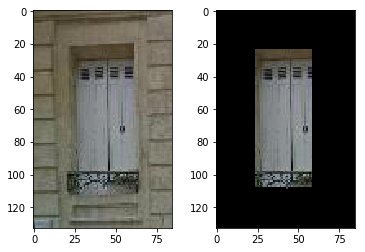

windows/31ada00430a211e99a70613cc4b52a17.jpg
1351806
(457, 986, 3)
31ada00430a211e99a70613cc4b52a17
Box A: 
[(702, 456, 1, 1), (702, 441, 4, 1), (184, 184, 617, 273)]
Box B: 
[200.99810293811882, 267.08694320634334, 1187.3545811803765, 724.0803872546826]
None


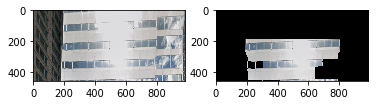

windows/2e90505630a211e99a70613cc4b52a17.jpg
43500
(125, 116, 3)
2e90505630a211e99a70613cc4b52a17
Box A: 
[(64, 101, 2, 1), (23, 42, 60, 60), (45, 23, 1, 1), (23, 23, 21, 1)]
Box B: 
[730.2366802661421, 1006.6085197199483, 846.4313215470282, 1131.7789832664218]
None


[[22.14631569 24.0639707 ]
 [83.81323793 22.14631569]
 [83.81323793 94.33991027]
 [22.14631569 95.967368  ]
 [22.14631569 24.0639707 ]]
windows/30a6b2ea30a211e99a70613cc4b52a17.jpg
37524
(118, 106, 3)
30a6b2ea30a211e99a70613cc4b52a17
Box A: 
[(22, 51, 30, 39), (22, 22, 62, 75), (46, 22, 2, 1), (22, 22, 22, 4)]
Box B: 
[558.3256111602648, 587.7906065799967, 664.2851647833791, 705.9042902675101]
None


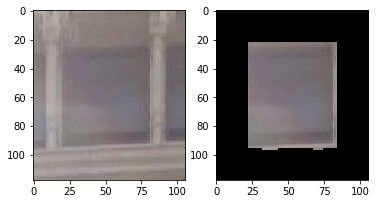

[[ 28.2  28.2]
 [ 78.2  28.2]
 [ 78.2 122.2]
 [ 28.2 122.2]
 [ 28.2  28.2]]
windows/31a77e3630a211e99a70613cc4b52a17.jpg
47700
(150, 106, 3)
31a77e3630a211e99a70613cc4b52a17
Box A: 
[(57, 77, 3, 1), (41, 77, 3, 1), (40, 75, 13, 1), (60, 73, 3, 1), (43, 73, 1, 1), (57, 53, 16, 25), (69, 42, 4, 6)]
Box B: 
[710.8, 945.8, 817.2, 1096.2]
None


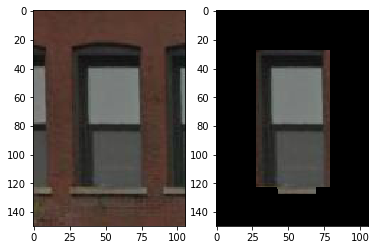

windows/32296f1830a211e99a70613cc4b52a17.jpg
9828
(84, 39, 3)
32296f1830a211e99a70613cc4b52a17
Box A: 
[(21, 55, 2, 2), (19, 46, 4, 5), (17, 39, 1, 1), (17, 15, 6, 18)]
Box B: 
[194.4, 807.4, 232.6, 890.6]
None


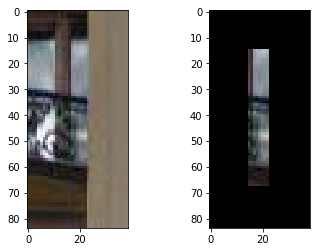

windows/3177ae0430a211e99a70613cc4b52a17.jpg
30576
(104, 98, 3)
3177ae0430a211e99a70613cc4b52a17
Box A: 
[(38, 81, 1, 1), (69, 76, 1, 2), (38, 76, 1, 2), (69, 71, 1, 4), (69, 55, 1, 3), (23, 53, 9, 30), (23, 37, 1, 4), (38, 29, 1, 44), (38, 27, 1, 1)]
Box B: 
[693.5, 1049.5, 792.5, 1153.5]
None


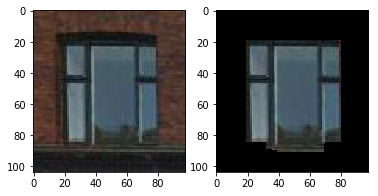

[[18.3463342  18.3463342 ]
 [71.91043676 18.56474032]
 [71.91043676 79.50078152]
 [18.3463342  79.28237539]
 [18.3463342  18.3463342 ]]
windows/320f27ca30a211e99a70613cc4b52a17.jpg
26754
(98, 91, 3)
320f27ca30a211e99a70613cc4b52a17
Box A: 
[(52, 49, 17, 5), (18, 26, 54, 54)]
Box B: 
[885.397255547714, 681.2171672024875, 975.654026503568, 779.0642829138244]
None


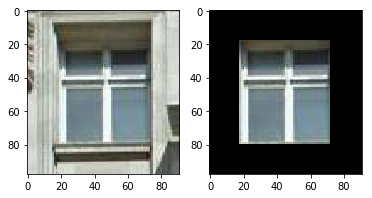

windows/2e904dd630a211e99a70613cc4b52a17.jpg
29760
(124, 80, 3)
2e904dd630a211e99a70613cc4b52a17
Box A: 
[(23, 42, 14, 59)]
Box B: 
[1195.890688607822, 997.0473313629931, 1275.6297327723478, 1121.2842101501421]
None


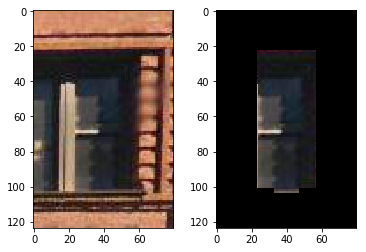

windows/3ff8769830a211e99a70613cc4b52a17.jpg
26010
(102, 85, 3)
3ff8769830a211e99a70613cc4b52a17
Box A: 
[(21, 48, 44, 35), (60, 27, 3, 17), (56, 27, 1, 1), (23, 24, 1, 1), (40, 23, 3, 20)]
Box B: 
[1177.8, 672.8, 1263.2, 775.2]
None


windows/3a2ba6d630a211e99a70613cc4b52a17.jpg
19440
(90, 72, 3)
3a2ba6d630a211e99a70613cc4b52a17
Box A: 
[(51, 72, 1, 1), (51, 62, 1, 8), (16, 53, 1, 2), (51, 51, 1, 2), (16, 49, 1, 3), (16, 45, 1, 1), (16, 41, 1, 1), (16, 33, 1, 1), (16, 16, 39, 1)]
Box B: 
[1237.2, 1138.2, 1308.8, 1227.8]
None


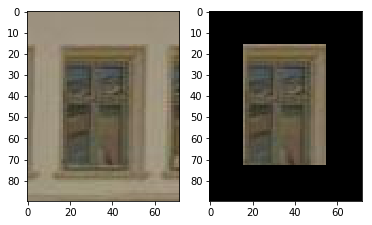

windows/3ea36a2830a211e99a70613cc4b52a17.jpg
16254
(86, 63, 3)
3ea36a2830a211e99a70613cc4b52a17
Box A: 
[]
Box B: 
[653.8, 1001.8, 717.2, 1088.2]
None


windows/2f9e1e8830a211e99a70613cc4b52a17.jpg
42864
(152, 94, 3)
2f9e1e8830a211e99a70613cc4b52a17
Box A: 
[(50, 118, 3, 3), (30, 118, 2, 2), (51, 115, 2, 2), (30, 115, 1, 2), (30, 112, 1, 1), (30, 106, 2, 4), (60, 99, 1, 2), (56, 99, 10, 12), (50, 99, 4, 14), (45, 99, 3, 12), (39, 99, 5, 12), (35, 99, 3, 12), (30, 99, 2, 6), (39, 97, 1, 1), (62, 95, 4, 3), (56, 95, 4, 3), (51, 95, 3, 3), (45, 95, 3, 3), (41, 95, 2, 3), (35, 95, 3, 3), (30, 95, 2, 2), (45, 90, 3, 4), (35, 90, 9, 4), (29, 90, 3, 4), (56, 89, 10, 5), (50, 89, 4, 5), (56, 63, 10, 24), (35, 63, 13, 25), (50, 60, 4, 27), (35, 36, 31, 18), (29, 29, 37, 58)]
Box B: 
[524.5, 1008.5, 618.5, 1160.5]
None


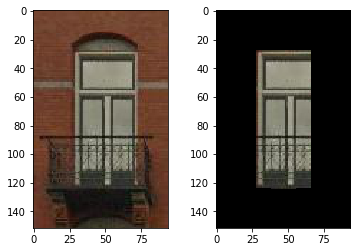

[[17.4 17.4]
 [44.4 17.4]
 [44.4 75.4]
 [17.4 75.4]
 [17.4 17.4]]
windows/3c64a22c30a211e99a70613cc4b52a17.jpg
16836
(92, 61, 3)
3c64a22c30a211e99a70613cc4b52a17
Box A: 
[(27, 74, 15, 1), (25, 74, 1, 1), (30, 66, 1, 1), (28, 66, 1, 1), (22, 65, 1, 1), (20, 61, 1, 1), (25, 55, 2, 2), (20, 55, 1, 3), (28, 53, 1, 1), (22, 51, 1, 5), (22, 37, 1, 12), (30, 34, 7, 1), (25, 34, 4, 1), (33, 21, 1, 1), (37, 18, 1, 1), (18, 17, 25, 56)]
Box B: 
[841.6, 1212.6, 903.4, 1305.4]
None


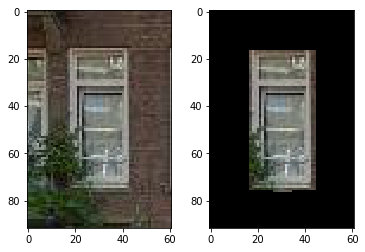

windows/2dd8a6b830a211e99a70613cc4b52a17.jpg
101688
(223, 152, 3)
2dd8a6b830a211e99a70613cc4b52a17
Box A: 
[(41, 145, 31, 28)]
Box B: 
[897.3, 666.3, 1048.7, 888.7]
None


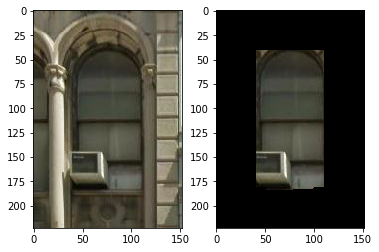

[[ 27.90160812  27.90160812]
 [120.90696854  27.90160812]
 [120.90696854  80.99894885]
 [ 27.90160812  80.99894885]
 [ 27.90160812  27.90160812]]
windows/4079cff430a211e99a70613cc4b52a17.jpg
48723
(109, 149, 3)
4079cff430a211e99a70613cc4b52a17
Box A: 
[(30, 76, 1, 1), (30, 73, 1, 1), (88, 39, 1, 1), (28, 30, 93, 54), (111, 30, 4, 2)]
Box B: 
[868.8873369987801, 671.8180955753988, 1017.6959136632527, 780.7186525530291]
None


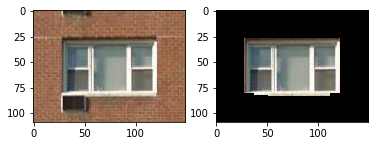

In [71]:
thickness = 10 # thickness length is 2 pixel 
for i in range(100):
    img, poly = wd[i]
    rect = get_rect_from_poly(wd.polygon(i))
    np_im = np.array(img)
    mask = np.zeros(np_im.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    for r in range(np_im.shape[0]):
        for c in range(np_im.shape[1]):
            if rect[0] <= c <= (rect[0]+rect[2]) and rect[1] <= r <= (rect[1]+rect[3]):
                # inside rect
                mask[r, c] = cv2.GC_FGD
            elif (c-thickness) >= rect[0] and (c+thickness) <= (rect[0]+rect[2]) and (r-thickness) >= rect[1] and (r+thickness) >= (rect[1] + rect[3]):
                # within ribbon
                mask[r, c] = cv2.GC_PR_BGD
            else:
                mask[r, c] = cv2.GC_BGD
    mask, bgdModel, fgdModel = cv2.grabCut(np_im,mask,rect,bgdModel,fgdModel,25,cv2.GC_INIT_WITH_MASK)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    final_img = np_im*mask[:,:,np.newaxis]
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(img)
    f.add_subplot(1,2, 2)
    plt.imshow(final_img)
    #print(wd.meta(i).bbox)
    print(wd.image_path(i))
    print(final_img.size)
    print(final_img.shape)
    print(wd.meta(i).name)
    print(compute_iou(final_img, wd.meta(i).bbox))
    plt.show()

hi


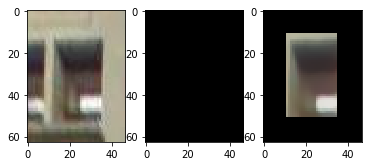

[[14.79891218 14.55368084]
 [42.91063522 14.9297027 ]
 [42.40654779 62.9406097 ]
 [14.55368084 63.06595031]
 [14.79891218 14.55368084]]


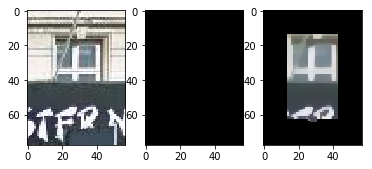

[[17.4 17.4]
 [68.4 17.4]
 [68.4 75.4]
 [17.4 75.4]
 [17.4 17.4]]


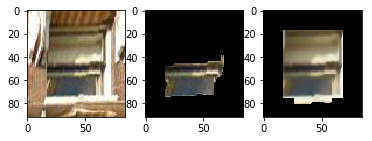

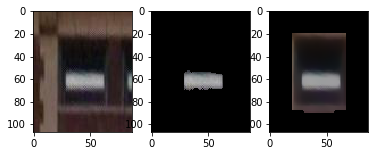

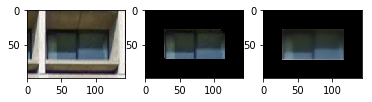

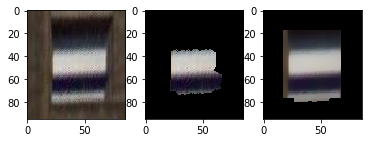

[[175.5 181.5]
 [313.5 181.5]
 [461.5 175.5]
 [613.5 178.5]
 [760.5 180.5]
 [759.5 226.5]
 [175.5 228.5]]


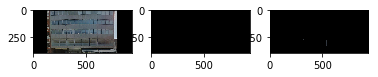

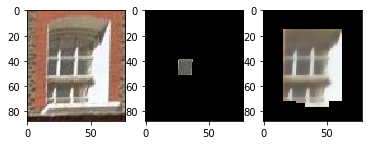

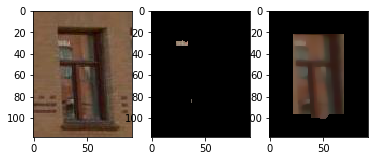

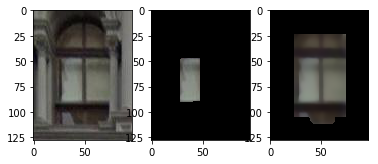

[[16.5 16.5]
 [53.5 16.5]
 [53.5 71.5]
 [16.5 71.5]
 [16.5 16.5]]


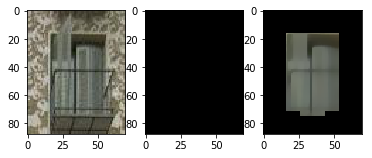

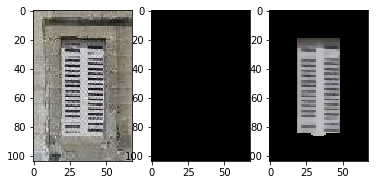

[[ 23.7  23.7]
 [ 93.7  25.7]
 [ 93.7 102.7]
 [ 23.7 100.7]
 [ 23.7  23.7]]


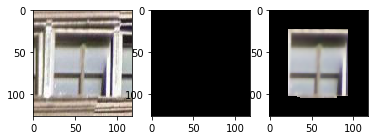

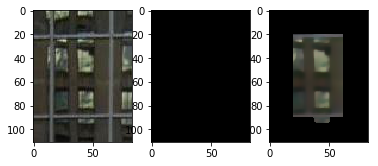

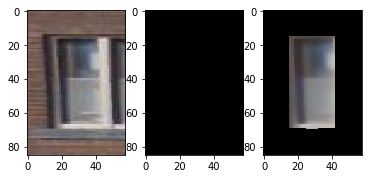

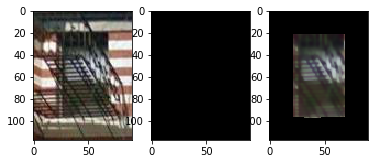

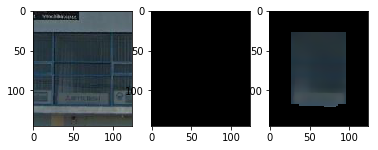

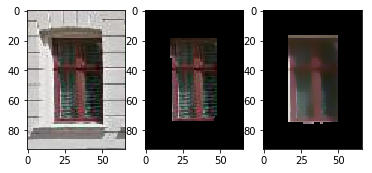

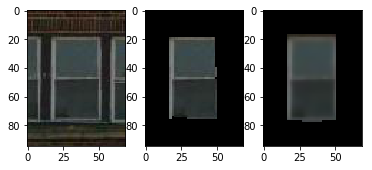

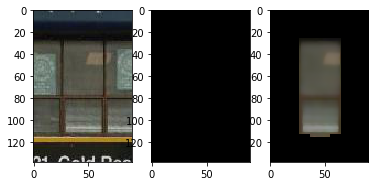

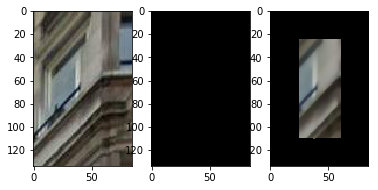

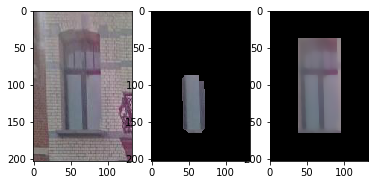

[[22.2 22.2]
 [64.2 22.2]
 [64.2 96.2]
 [22.2 96.2]
 [22.2 22.2]]


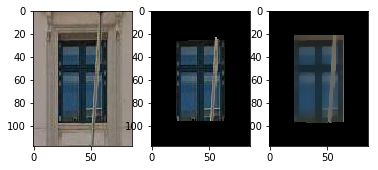

[[ 27.3  27.3]
 [ 64.3  27.3]
 [ 64.3 118.3]
 [ 27.3 118.3]
 [ 27.3  27.3]]


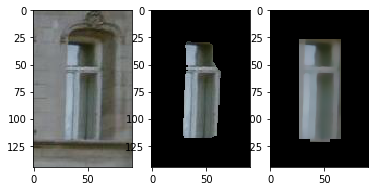

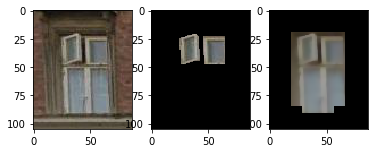

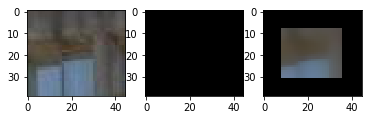

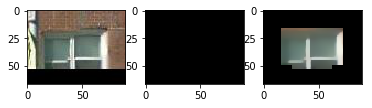

[[ 27.38029412  23.63619702]
 [ 66.72949929  23.63619702]
 [ 63.21580816 102.42352042]
 [ 23.63619702 102.42352042]
 [ 27.38029412  23.63619702]]


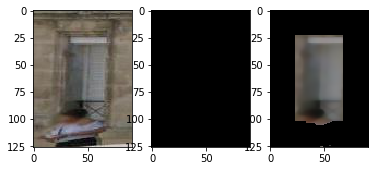

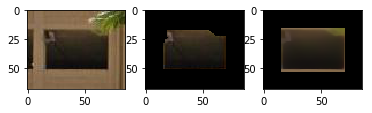

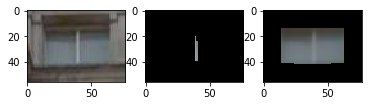

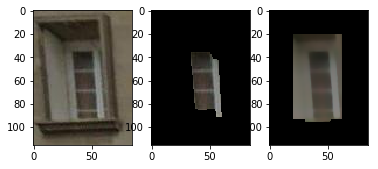

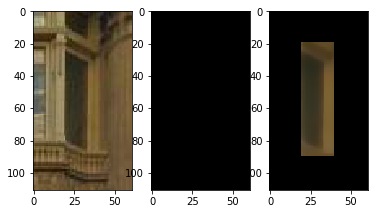

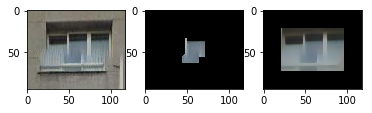

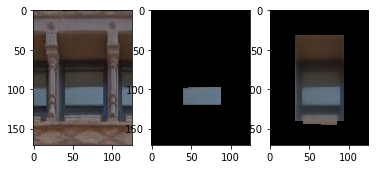

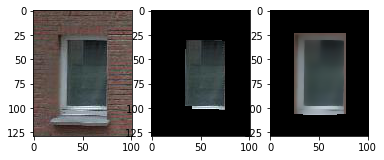

[[19.97997305 19.97997305]
 [84.97900837 19.97997305]
 [86.57988321 57.28053404]
 [21.91059619 57.28053404]
 [19.97997305 19.97997305]]


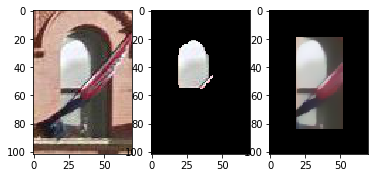

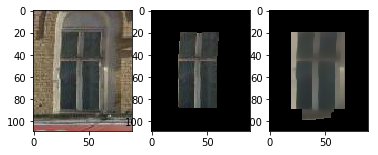

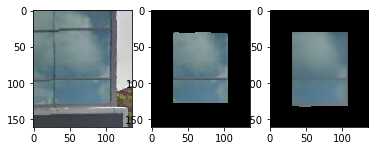

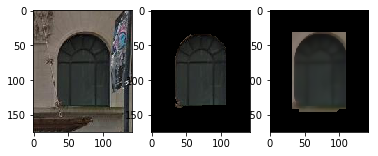

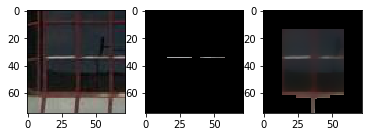

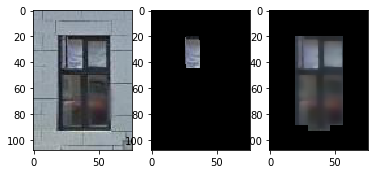

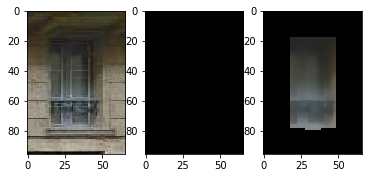

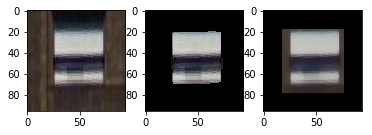

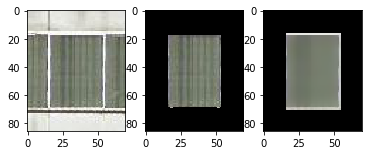

[[ 26.1  26.1]
 [ 69.1  26.1]
 [ 69.1 113.1]
 [ 26.1 113.1]
 [ 26.1  26.1]]


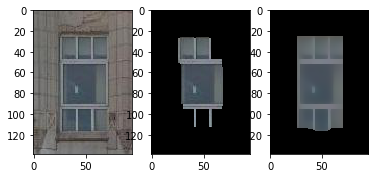

[[17.361948   17.11642423]
 [54.11067331 18.13256227]
 [53.97302134 74.17117168]
 [17.11642423 73.36323394]
 [17.361948   17.11642423]]


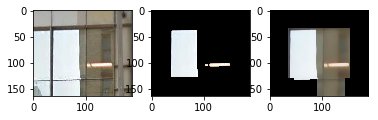

[[ 26.4  26.4]
 [ 71.4  26.4]
 [ 71.4 114.4]
 [ 26.4 114.4]
 [ 26.4  26.4]]


[[14.26374194 14.26374194]
 [61.80954839 16.49245161]
 [61.27890323 60.536     ]
 [14.68825806 58.09503226]
 [14.26374194 14.26374194]]


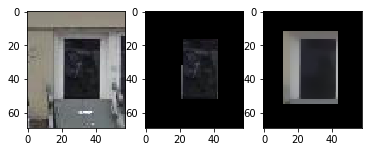

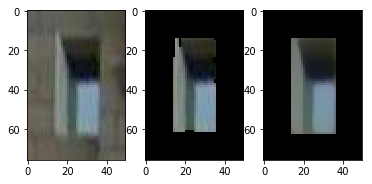

[[16.5 16.5]
 [56.5 16.5]
 [56.5 71.5]
 [16.5 71.5]
 [16.5 16.5]]


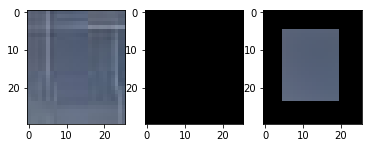

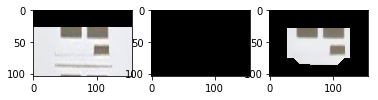

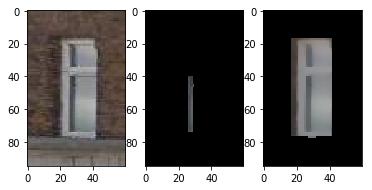

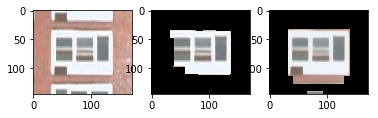

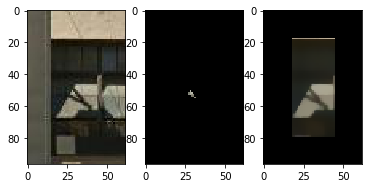

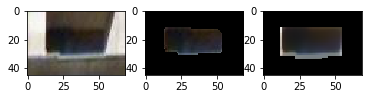

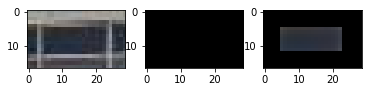

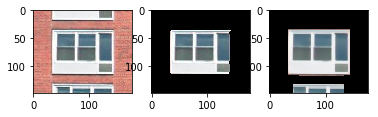

[[ 24.99255459  24.99255459]
 [ 59.76918939  24.99255459]
 [ 59.96102301 108.30106989]
 [ 25.57265733 108.30106989]
 [ 24.99255459  24.99255459]]


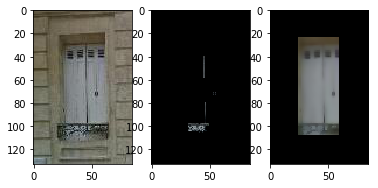

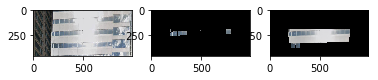

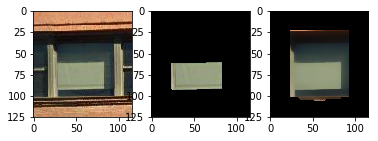

[[22.14631569 24.0639707 ]
 [83.81323793 22.14631569]
 [83.81323793 94.33991027]
 [22.14631569 95.967368  ]
 [22.14631569 24.0639707 ]]


[[ 28.2  28.2]
 [ 78.2  28.2]
 [ 78.2 122.2]
 [ 28.2 122.2]
 [ 28.2  28.2]]


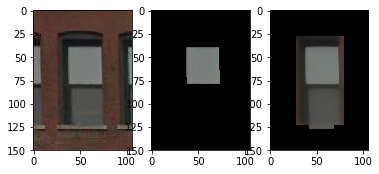

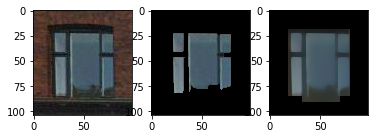

[[18.3463342  18.3463342 ]
 [71.91043676 18.56474032]
 [71.91043676 79.50078152]
 [18.3463342  79.28237539]
 [18.3463342  18.3463342 ]]


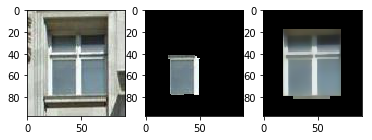

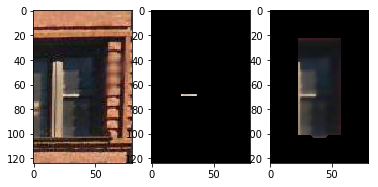

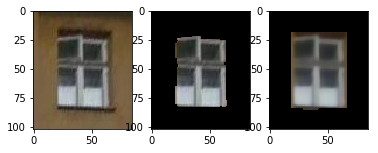

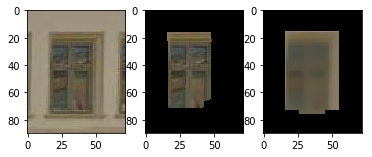

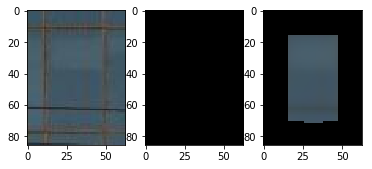

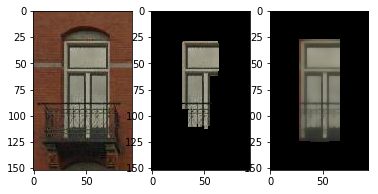

[[17.4 17.4]
 [44.4 17.4]
 [44.4 75.4]
 [17.4 75.4]
 [17.4 17.4]]


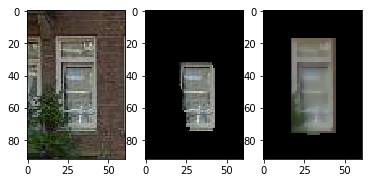

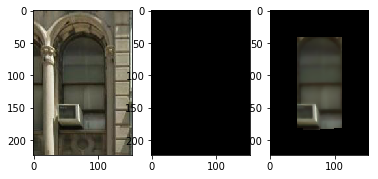

[[ 27.90160812  27.90160812]
 [120.90696854  27.90160812]
 [120.90696854  80.99894885]
 [ 27.90160812  80.99894885]
 [ 27.90160812  27.90160812]]


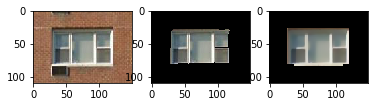

In [67]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

from skimage import data, img_as_float
from skimage.util import random_noise

print("hi")
for i in range(100):
    img, poly = wd[i]
    rect = get_rect_from_poly(wd.polygon(i))
    np_im = np.array(img)
    #without denoising
    mask = np.zeros(np_im.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    for r in range(np_im.shape[0]):
        for c in range(np_im.shape[1]):
            if rect[0] <= c <= (rect[0]+rect[2]) and rect[1] <= r <= (rect[1]+rect[3]):
                # inside rect
                mask[r, c] = cv2.GC_FGD
            elif (c-thickness) >= rect[0] and (c+thickness) <= (rect[0]+rect[2]) and (r-thickness) >= rect[1] and (r+thickness) >= (rect[1] + rect[3]):
                # within ribbon
                mask[r, c] = cv2.GC_PR_BGD
            else:
                mask[r, c] = cv2.GC_BGD
    mask, bgdModel, fgdModel = cv2.grabCut(np_im,mask,rect,bgdModel,fgdModel,25,cv2.GC_INIT_WITH_RECT)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    final_img = np_im*mask[:,:,np.newaxis]
    
    #with denoising
    denoised_im = (255*denoise_tv_chambolle(np_im, weight=0.1, multichannel=True)).astype(np.uint8)
    
    mask = np.zeros(denoised_im.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    for r in range(denoised_im.shape[0]):
        for c in range(denoised_im.shape[1]):
            if rect[0] <= c <= (rect[0]+rect[2]) and rect[1] <= r <= (rect[1]+rect[3]):
                # inside rect
                mask[r, c] = cv2.GC_FGD
            elif (c-thickness) >= rect[0] and (c+thickness) <= (rect[0]+rect[2]) and (r-thickness) >= rect[1] and (r+thickness) >= (rect[1] + rect[3]):
                # within ribbon
                mask[r, c] = cv2.GC_PR_BGD
            else:
                mask[r, c] = cv2.GC_BGD
    mask, bgdModel, fgdModel = cv2.grabCut(denoised_im,mask,rect,bgdModel,fgdModel,25,cv2.GC_INIT_WITH_MASK)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    final_img2 = denoised_im*mask[:,:,np.newaxis]
    
    # show images
    f = plt.figure()
    f.add_subplot(1,3, 1)
    plt.imshow(img)
    f.add_subplot(1,3, 2)
    plt.imshow(final_img)
    f.add_subplot(1, 3, 3)
    plt.imshow(final_img2)
    plt.show()




In [55]:
from skimage import exposure

img_adapteq = exposure.equalize_adapthist(wd[0], clip_limit=0.03)

AttributeError: 'tuple' object has no attribute 'ndim'